# Uber vs. Lyft
By: Karin Falconer-Bailey

#### Table of contents
* [Chapter 1: Importing functions](#Functions)
* [Chapter 2: Data preparation](#chapter02)
    * [2.1. Missing values](#section_2_1)
    * [2.2. Removing unwanted columns](#section_2_2)
* [Chapter 3: Data derivation](#chapter03)
    * [3.1 Renaming columns](#section_3_1)
    * [3.2. Changing feature units](#section_3_2)
        * [3.2.1. Averaging weather data](#section_3_2_1)
    * [3.3. Detecting and filtering outliers](#section_3_3)
        * [3.3.1. Price](#section_3_3_1)
        * [3.3.2. Distance](#section_3_3_2)
        * [3.3.3. Price multiplier](#section_3_3_3)
        * [3.3.4. Temperature](#section_3_3_4)
        * [3.3.5. Clouds](#section_3_3_5)
        * [3.3.6. Pressure](#section_3_3_6)
        * [3.3.7. Rain](#section_3_3_7)
        * [3.3.8. Humidity](#section_3_3_8)
        * [3.3.9. Wind](#section_3_3_9)
* [Chapter 4: Data wrangling](#chapter04)
    * [4.1. Merging the data](#section_4_1)
    * [4.2. Dummy variables](#section_4_2)
    * [4.3. Saving the data](#section_4_3)
* [Chapter 5: Model Construction](#chapter05)
    * [5.1. EDA Correlation plot](#section_5_1)
        * [5.1.1. Correlation plot](#section_5_1_1)
        * [5.1.2. Pie chart cab population plot](#section_5_1_2)
        * [5.1.3. Central tendencies of price](#section_5_1_3)
        * [5.1.4. Bar chart of cab types](#section_5_1_4)
        * [5.1.5. Line graph of price per weekday](#section_5_1_5)
    * [5.2. Feature selection](#section_5_2)
        * [5.2.1. Changing feature indices](#section_5_2_1)
        * [5.2.2. Filter method](#section_5_2_2)
    * [5.3. Predictive modelling](#section_5_3)
        * [5.3.1. Predictor and response](#section_5_3_1)
        * [5.3.2. Standardization](#section_5_3_2)
        * [5.3.3. Train and test split](#section_5_3_3)
        * [5.3.4. Multiple Linear Regression](#section_5_3_4)
            * [5.4.4.1. Multiple Linear Regression model 01](#section_5_3_4_1)
            * [5.4.4.2. Multiple Linear Regression model 02](#section_5_3_4_2)
        * [5.3.5. Lasso Regression](#section_5_3_5)
        * [5.3.6. Final predictive model](#section_5_3_6)
            * [5.3.6.1. Interpreting the final model](#section_5_3_6_1)

        














     

## Chapter 1: Importing functions <a class="anchor" id="Functions"></a>


##### Importing Python functions:
In order to undergo the stages of data analysis, we first must important the necessary functions to do so.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import os 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from statistics import mean
from datetime import datetime
from tabulate import tabulate

Since the data has been sourced secondarily, the second stage is data preparation. This includes removing or replacing missing values, handling outliers, removing unnecessary variables. 

## Chapter 2: Data preparation <a class="anchor" id="chapter02"></a>


##### Let's go!
##### Open CSV files:
First we open the files, and save them as their own variable.

In [2]:
file = open('cab_rides.csv')
file = open('weather.csv')
df_cab = pd.read_csv('cab_rides.csv')
df_weather = pd.read_csv('weather.csv')

###### Display the dataframes:
Here, I display the dataframes to gain familiarity to the files.

In [3]:
df_cab

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [4]:
df_weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


### 2.1. Missing values <a class="anchor" id="section_2_1"></a>

##### Check for missing values:
To begin the data preparation process we now analyse the data for missing values.

In [5]:
df_cab.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [6]:
df_weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

##### Scrub-a-dub-dub... cleaning the datasets
##### First for the 'cab' dataframe:
Seeing as the cab data frame consists of 55,095 missing values, these will instead be removed opposed to being filled with the mean of price. The datatset originally consisted of 693,071 observations and thus removing missing values should not disrupt the data. 

In [7]:
df_cab.dropna(inplace=True)

##### Imputation for the 'weather' dataframe:
The weather data frame's missing values will be replaced with rain's mean.

In [8]:
df_weather.replace(0, np.nan, inplace=True)
df_weather['rain'] = df_weather['rain'].fillna(df_weather['rain'].mean())
df_weather

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.122800,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.184600,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.108900,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.096900,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.178600,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.057652,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.057652,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.057652,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.057652,1543819974,0.96,1.54


##### Ensure datasets are squeaky clean:
Checking for missing values again, just to ensure the data has been successfully cleansed.

In [9]:
df_cab.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [10]:
df_weather.isna().sum()

temp           0
location       0
clouds        96
pressure       0
rain           0
time_stamp     0
humidity       0
wind           0
dtype: int64

#### 2.2. Removing unwanted columns <a class="anchor" id="section_2_2"></a>

##### Drop unwanted columns: 'id', 'timestamp' & 'product_id'
Both the id, timestamp, and production id variables serve no purpose in the analysis, nor do will they be involved in answering the study's questions of research. Therefore, the two variables are moved from the dataset.

In [11]:
df_cab.drop(df_cab.columns[[7,8]], axis = 1, inplace = True)
df_weather.drop(df_weather.columns[[5]], axis = 1, inplace = True)

Again, I display the dataframe, to ensure that the columns have been removed.

In [12]:
df_cab

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,Black SUV


In [13]:
df_weather

,temp,location,clouds,pressure,rain,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.122800,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.184600,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.108900,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.096900,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.178600,0.75,11.49
...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.057652,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.057652,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.057652,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.057652,0.96,1.54


## Chapter 3: Data derivation <a class="anchor" id="chapter03"></a>

#### 3.1. Renaming columns <a class="anchor" id="section_3_1"></a>

For the purpose of making the dataset more legible, and grammatically correct the column names have been renamed. This includes capitalising variable names, altering variable names and the removal of underscores.

In [14]:
df_cab.rename(columns = {'distance':'Distance','cab_type':'Cab','time_stamp':'Timestamp',
                         'destination':'Destination','source':'Source','price':'Price',
                         'surge_multiplier':'Multiplier','name':'CabType'}, inplace = True)
df_cab

,Distance,Cab,Timestamp,Destination,Source,Price,Multiplier,CabType
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL
...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,Black SUV


In [15]:
df_weather.rename(columns = {'temp':'Temperature','location':'Source','clouds':'Clouds',
                         'pressure':'Pressure','rain':'Rain','time_stamp':'Timestamp','humidity':'Humidity','wind':'Wind'}, inplace = True)
df_weather

,Temperature,Source,Clouds,Pressure,Rain,Humidity,Wind
0,42.42,Back Bay,1.00,1012.14,0.122800,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.184600,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.108900,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.096900,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.178600,0.75,11.49
...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.057652,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.057652,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.057652,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.057652,0.96,1.54


#### 3.2. Changing feature units <a class="anchor" id="section_3_2"></a>

##### Change units of 'Timestamp' within the cab data frame and convert into different columns:
For easier interpretability, we alter the timestamp variable.
We convert the single column into 5: date, time, weekday, hour, and time of day.

In [16]:
# Source: https://www.kaggle.com/prahauk/uber-vs-lyft-analysis?scriptVersionId=52285310&cellId=11

df_cab["Rounded_Timestamp"] = df_cab["Timestamp"] / 1000
df_cab["Rounded_Timestamp"] = df_cab["Rounded_Timestamp"].apply(np.floor)

df_cab["Date"] = df_cab["Rounded_Timestamp"].apply(lambda x : datetime.fromtimestamp(x).date())
df_cab["Time"] = df_cab["Rounded_Timestamp"].apply(lambda x: datetime.fromtimestamp(x).time())
df_cab["Weekday"] = df_cab["Date"].apply(lambda x: x.weekday())
df_cab["Weekday"] = df_cab["Weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df_cab["Hour"] = df_cab["Time"].apply(lambda time: time.hour)

df_cab.loc[(df_cab.Hour >= 6) & (df_cab.Hour < 12) , 'Time_of_day'] = 'Morning'
df_cab.loc[(df_cab.Hour >= 12) & (df_cab.Hour < 15) , 'Time_of_day'] = 'Afternoon'
df_cab.loc[(df_cab.Hour >= 15) & (df_cab.Hour < 18) , 'Time_of_day'] = 'Evening'
df_cab.loc[(df_cab.Hour >= 18) | (df_cab.Hour < 6) , 'Time_of_day'] = 'Night'

df_cab = df_cab[['Distance','Cab','Destination','Source','Price','Multiplier','CabType','Weekday','Hour','Time_of_day']]
df_cab

,Distance,Cab,Destination,Source,Price,Multiplier,CabType,Weekday,Hour,Time_of_day
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,Sunday,9,Morning
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,Tuesday,2,Night
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,Wednesday,1,Night
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,Friday,4,Night
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,Thursday,3,Night
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,North End,West End,9.5,1.0,WAV,Saturday,23,Night
693066,1.00,Uber,North End,West End,13.0,1.0,UberXL,Saturday,23,Night
693067,1.00,Uber,North End,West End,9.5,1.0,UberX,Saturday,23,Night
693069,1.00,Uber,North End,West End,27.0,1.0,Black SUV,Saturday,23,Night


##### 3.2.1. Averaging weather data <a class="anchor" id="section_3_2_1"></a>

Using the two Kaggle sources of code listed below, we average out the all values in the weather data frame by the variable 'source'.

In [17]:
# Sources: https://www.kaggle.com/gcdatkin/lyft-uber-price-prediction?scriptVersionId=51672019&cellId=19
# https://www.kaggle.com/gcdatkin/lyft-uber-price-prediction?scriptVersionId=51672019&cellId=20

df_weather.groupby('Source').mean()
df_avgweather = df_weather.groupby('Source').mean().reset_index(drop=False)
df_avgweather

,Source,Temperature,Clouds,Pressure,Rain,Humidity,Wind
0,Back Bay,39.082122,0.688971,1008.447820,0.057420,0.764073,6.778528
1,Beacon Hill,39.047285,0.688330,1008.448356,0.057572,0.765048,6.810325
2,Boston University,39.047744,0.689786,1008.459254,0.057233,0.763786,6.692180
3,Fenway,38.964379,0.690427,1008.453289,0.057279,0.767266,6.711721
4,Financial District,39.410822,0.687243,1008.435793,0.058169,0.754837,6.860019
5,Haymarket Square,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193
6,North End,39.090841,0.687243,1008.441912,0.057808,0.764054,6.853117
7,North Station,39.035315,0.687515,1008.442811,0.057483,0.765545,6.835755
8,Northeastern University,38.975086,0.688854,1008.444168,0.057183,0.767648,6.749426
9,South Station,39.394092,0.688019,1008.438031,0.057915,0.755468,6.848948


#### 3.3 Detecting and filtering outliers <a class="anchor" id="section_3_3"></a>

##### 3.3.1. Price <a class="anchor" id="section_3_3_1"></a>

Create a boxplot for the distribution of price.

0.25     9.0
0.50    13.5
0.75    22.5
Name: Price, dtype: float64


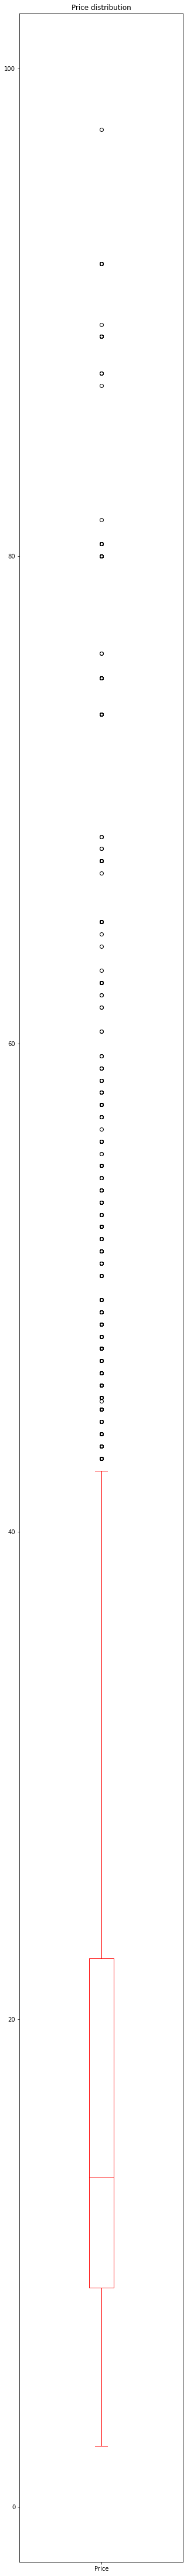

In [18]:
print(df_cab['Price'].quantile([0.25, 0.5, 0.75]))
df_cab['Price'].plot(kind='box', title='Price distribution', color='r', figsize=(5,80))
plt.show()

##### 3.3.2. Distance <a class="anchor" id="section_3_3_2"></a>

Create a boxplot for the distribution of distance.

0.25    1.27
0.50    2.16
0.75    2.93
Name: Distance, dtype: float64


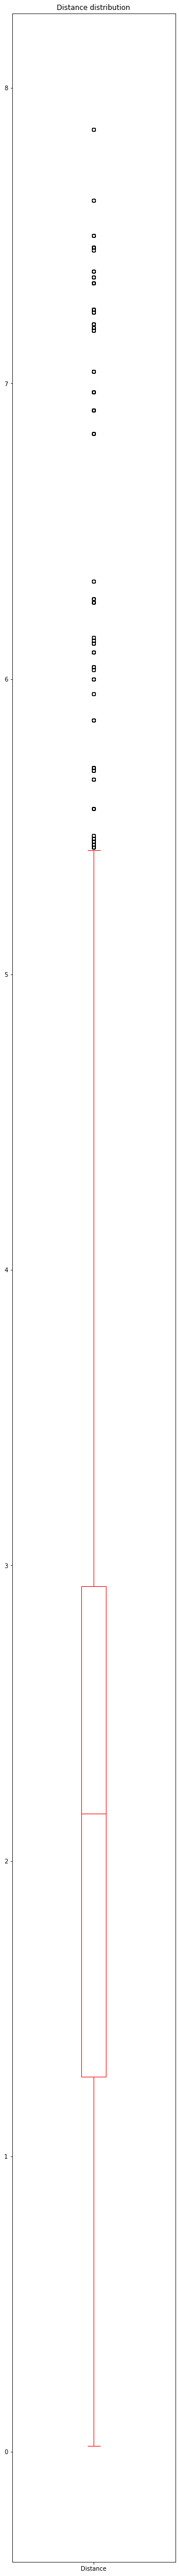

In [19]:
print(df_cab['Distance'].quantile([0.25, 0.5, 0.75]))
df_cab['Distance'].plot(kind='box', title='Distance distribution', color='r', figsize=(5,80))
plt.show()

##### 3.3.3. Price multiplier <a class="anchor" id="section_3_3_3"></a>

Create a boxplot for the distribution of the price multiplier.

0.25    1.0
0.50    1.0
0.75    1.0
Name: Multiplier, dtype: float64


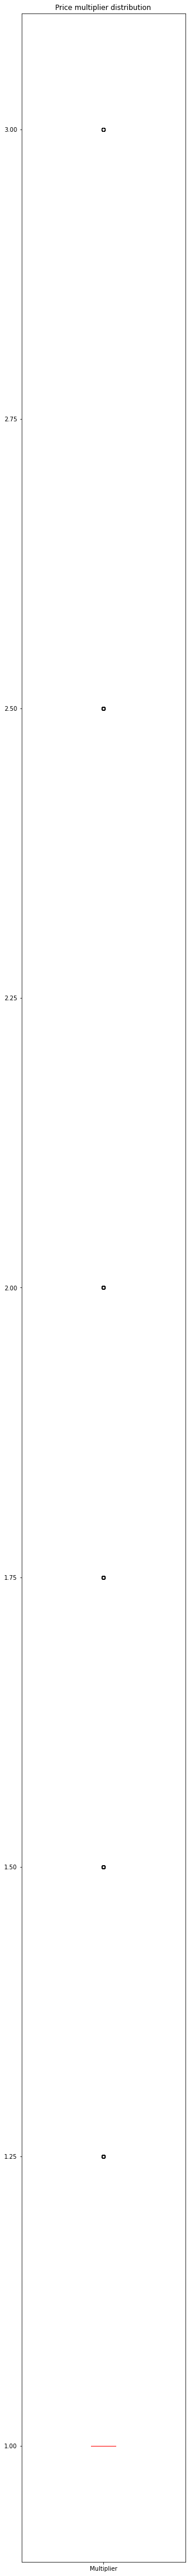

In [20]:
print(df_cab['Multiplier'].quantile([0.25, 0.5, 0.75]))
df_cab['Multiplier'].plot(kind='box', title='Price multiplier distribution',color='r',figsize=(5,80))
plt.show()

##### 3.3.4. Temperature <a class="anchor" id="section_3_3_4"></a>

Create a boxplot for the distribution of temperature.

0.25    38.985884
0.50    39.047514
0.75    39.084302
Name: Temperature, dtype: float64


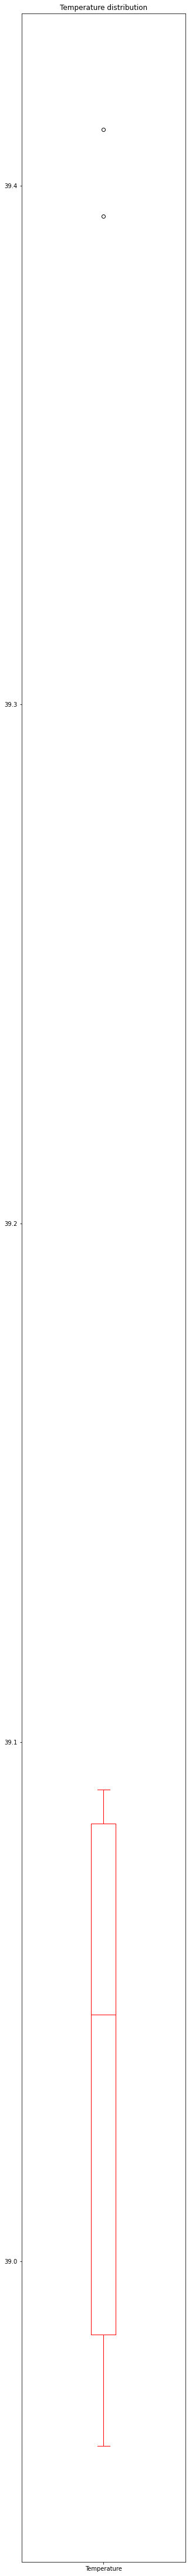

In [21]:
print(df_avgweather['Temperature'].quantile([0.25, 0.5, 0.75]))
df_avgweather['Temperature'].plot(kind='box', title='Temperature distribution',color='r', figsize=(5,80))
plt.show()

Create a histogram plot to visualise temperature distribution.

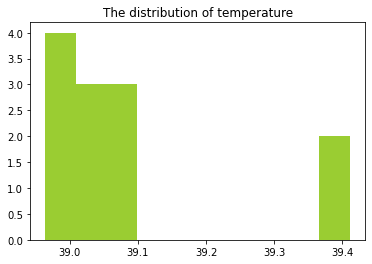

In [22]:
plt.hist(df_avgweather['Temperature'], color='yellowgreen')
plt.title('The distribution of temperature')
plt.show()

Convert the outlier values into NaN observations.

In [23]:
# Source: https://www.journaldev.com/51466/python-catboost-classifier-module

for x in ['Temperature']:
    q75,q25 = np.percentile(df_avgweather.loc[:,x],[75,25])
    intr_qr = q75-q25
    maximum = q75+(1.5*intr_qr)
    minimum = q25-(1.5*intr_qr)
    df_avgweather.loc[df_avgweather[x] < minimum,x] = np.nan
    df_avgweather.loc[df_avgweather[x] > maximum,x] = np.nan

##### 3.3.5. Clouds <a class="anchor" id="section_3_3_5"></a>

Create a boxplot for the distribution of clouds.

0.25    0.687447
0.50    0.688155
0.75    0.688883
Name: Clouds, dtype: float64


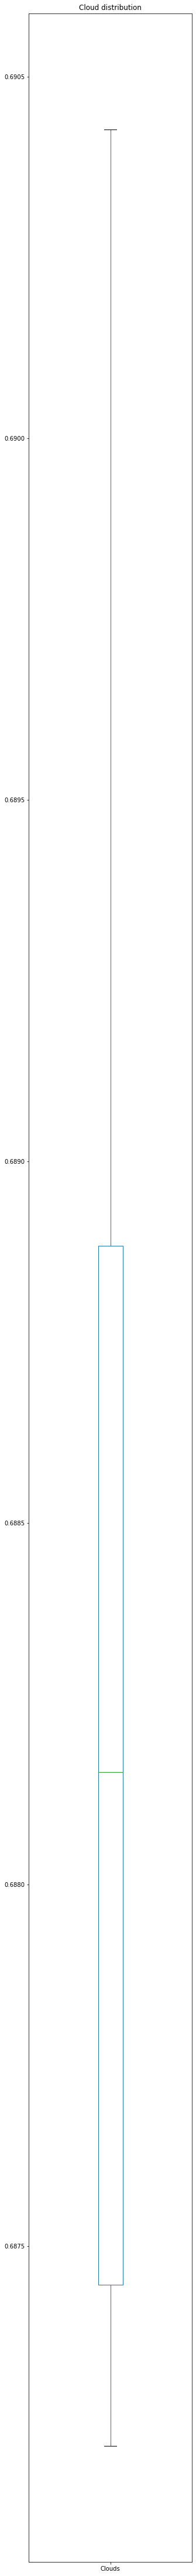

In [24]:
print(df_avgweather['Clouds'].quantile([0.25, 0.5, 0.75]))
df_avgweather['Clouds'].plot(kind='box', title='Cloud distribution', figsize=(5,80))
plt.show()

##### 3.3.6. Pressure <a class="anchor" id="section_3_3_6"></a>

Create a boxplot for the distribution of pressure.

0.25    1008.441707
0.50    1008.444455
0.75    1008.447954
Name: Pressure, dtype: float64


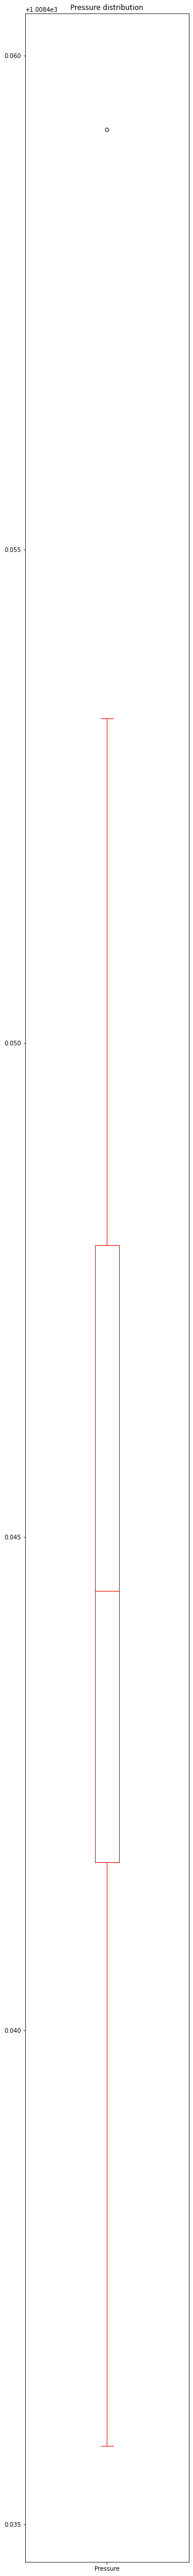

In [25]:
print(df_avgweather['Pressure'].quantile([0.25, 0.5, 0.75]))
df_avgweather['Pressure'].plot(kind='box', title='Pressure distribution',color='r', figsize=(5,80))
plt.show()

Create a histogram plot to visualise pressure distribution.

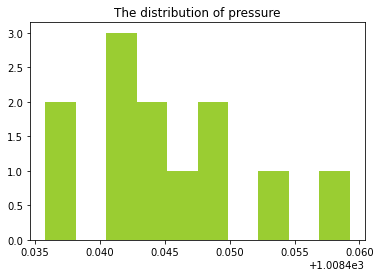

In [26]:
plt.hist(df_avgweather['Pressure'], color='yellowgreen')
plt.title('The distribution of pressure')
plt.show()

Convert the outlier values into NaN observations.

In [27]:
# Source: https://www.journaldev.com/51466/python-catboost-classifier-module

for x in ['Pressure']:
    q75,q25 = np.percentile(df_avgweather.loc[:,x],[75,25])
    intr_qr = q75-q25
    maximum = q75+(1.5*intr_qr)
    minimum = q25-(1.5*intr_qr)
    df_avgweather.loc[df_avgweather[x] < minimum,x] = np.nan
    df_avgweather.loc[df_avgweather[x] > maximum,x] = np.nan

##### 3.3.7. Rain <a class="anchor" id="section_3_3_7"></a>

Create a boxplot for the distribution of rain.

0.25    0.057385
0.50    0.057690
0.75    0.057920
Name: Rain, dtype: float64


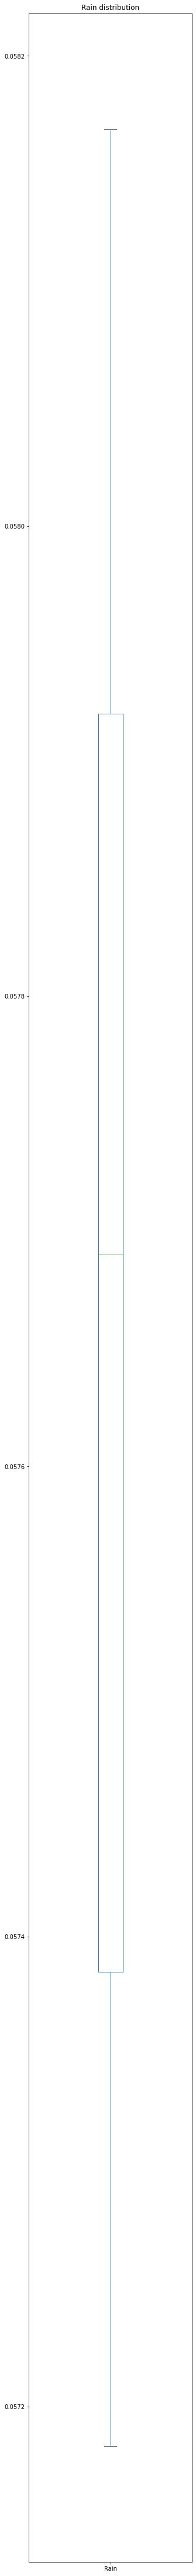

In [28]:
print(df_avgweather['Rain'].quantile([0.25, 0.5, 0.75]))
df_avgweather['Rain'].plot(kind='box', title='Rain distribution', figsize=(5,80))
plt.show()

##### 3.3.8. Humidity <a class="anchor" id="section_3_3_8"></a>

Create a boxplot for the distribution of humidity.

0.25    0.763987
0.50    0.764943
0.75    0.767266
Name: Humidity, dtype: float64


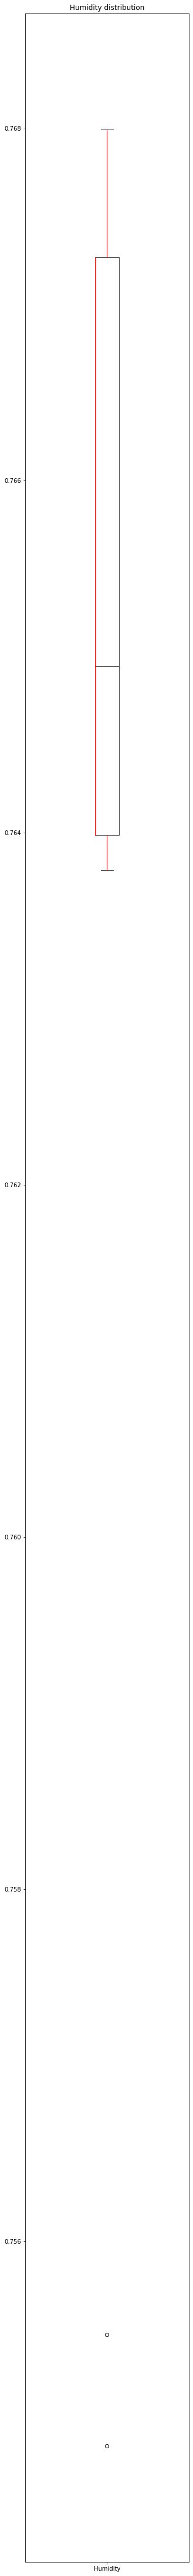

In [29]:
print(df_avgweather['Humidity'].quantile([0.25, 0.5, 0.75]))
df_avgweather['Humidity'].plot(kind='box', title='Humidity distribution',color='r', figsize=(5,80))
plt.show()

Create a histogram plot to visualise humidity distribution.

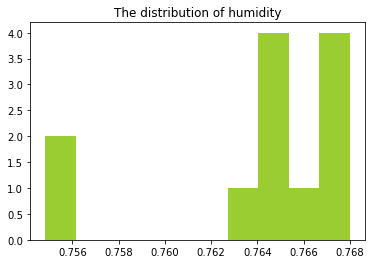

In [30]:
plt.hist(df_avgweather['Humidity'], color='yellowgreen')
plt.title('The distribution of humidity')
plt.show()

Convert the outlier values into NaN observations.

In [31]:
# Source: https://www.journaldev.com/51466/python-catboost-classifier-module

for x in ['Humidity']:
    q75,q25 = np.percentile(df_avgweather.loc[:,x],[75,25])
    intr_qr = q75-q25
    maximum = q75+(1.5*intr_qr)
    minimum = q25-(1.5*intr_qr)
    df_avgweather.loc[df_avgweather[x] < minimum,x] = np.nan
    df_avgweather.loc[df_avgweather[x] > maximum,x] = np.nan

##### 3.3.9. Wind <a class="anchor" id="section_3_3_9"></a>

Create a boxplot for the distribution of wind.

0.25    6.771252
0.50    6.825268
0.75    6.844632
Name: Wind, dtype: float64


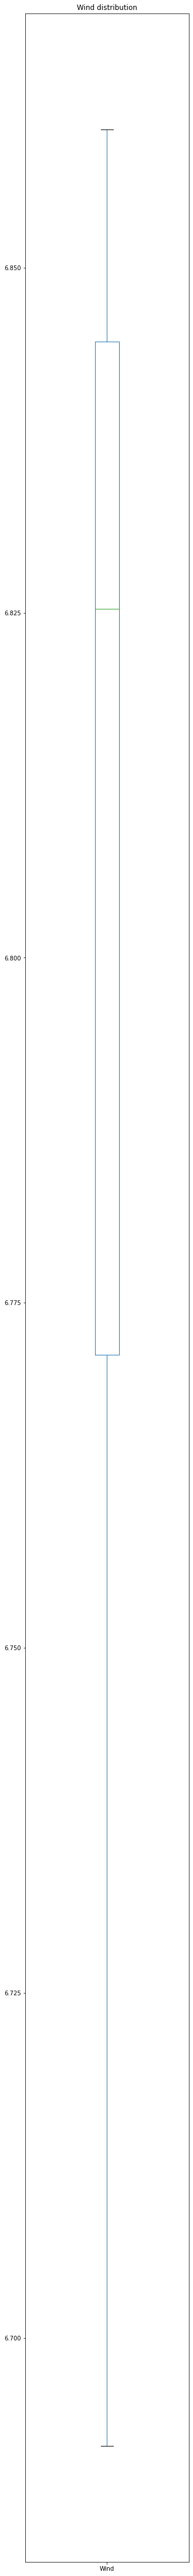

In [32]:
print(df_avgweather['Wind'].quantile([0.25, 0.5, 0.75]))
df_avgweather['Wind'].plot(kind='box', title='Wind distribution', figsize=(5,80))
plt.show()

Remove all rows with the NaN values.

In [33]:
df_avgweather.isnull().sum()

Source         0
Temperature    2
Clouds         0
Pressure       1
Rain           0
Humidity       2
Wind           0
dtype: int64

In [34]:
df_avgweather.dropna(inplace=True)
df_avgweather.isnull().sum()

Source         0
Temperature    0
Clouds         0
Pressure       0
Rain           0
Humidity       0
Wind           0
dtype: int64

## Chapter 4: Data wrangling <a class="anchor" id="chapter04"></a>

### 4.1. Merging the data <a class="anchor" id="section_4_1"></a>

Once content with the data preparation process, the two data frames are merged and saved as a new variable 'data'.

In [35]:
dfmerged = pd.merge(df_cab,df_avgweather, on='Source', how='left')
dfmerged

,Distance,Cab,Destination,Source,Price,Multiplier,CabType,Weekday,Hour,Time_of_day,Temperature,Clouds,Pressure,Rain,Humidity,Wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,Sunday,9,Morning,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,Tuesday,2,Night,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,Wednesday,1,Night,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,Friday,4,Night,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,Thursday,3,Night,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,North End,West End,9.5,1.0,WAV,Saturday,23,Night,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233
637972,1.00,Uber,North End,West End,13.0,1.0,UberXL,Saturday,23,Night,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233
637973,1.00,Uber,North End,West End,9.5,1.0,UberX,Saturday,23,Night,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233
637974,1.00,Uber,North End,West End,27.0,1.0,Black SUV,Saturday,23,Night,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233


### 4.2. Dummy variables <a class="anchor" id="section_4_2"></a>

In order to construct a linear regression model, all categorical variables must be converted into numerical form through the implementation of dummy variables. The variables which require a dummy form are 'Cab', 'CabType', 'Destination', 'Source', 'Time_of_day' and 'Weekday'.

In [36]:
data1 = pd.get_dummies(dfmerged, columns=['Weekday','Time_of_day'], prefix='', prefix_sep='')
data2 = pd.get_dummies(data1, columns=['Source'], prefix='Source', prefix_sep='.')
data3 = pd.get_dummies(data2, columns=['Cab'], prefix='Cab', prefix_sep='.')
data4 = pd.get_dummies(data3, columns=['CabType'], prefix='CabType', prefix_sep='.')
data = pd.get_dummies(data4, columns=['Destination'], prefix='Destination', prefix_sep='.')
data

,Distance,Price,Multiplier,Hour,Temperature,Clouds,Pressure,Rain,Humidity,Wind,...,Destination.Boston University,Destination.Fenway,Destination.Financial District,Destination.Haymarket Square,Destination.North End,Destination.North Station,Destination.Northeastern University,Destination.South Station,Destination.Theatre District,Destination.West End
0,0.44,5.0,1.0,9,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
1,0.44,11.0,1.0,2,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
2,0.44,7.0,1.0,1,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
3,0.44,26.0,1.0,4,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
4,0.44,9.0,1.0,3,39.067897,0.687223,1008.445239,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,9.5,1.0,23,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637972,1.00,13.0,1.0,23,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637973,1.00,9.5,1.0,23,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637974,1.00,27.0,1.0,23,38.983403,0.687767,1008.441090,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0


### 4.3. Saving the data <a class="anchor" id="section_4_3"></a>

Save new dataframe to a csv file:

In [37]:
data.to_csv('cabweatherdd.csv',index=False) # dummy variable saved file for modelling
dfmerged.to_csv('cabweatherEDA.csv',index=False) # original merged saved file for EDA

## Chapter 5: Model construction <a class="anchor" id="chapter05"></a>

This chapter details the production of the study's models.

### 5.1. EDA <a class="anchor" id="section_5_1"></a>

In this section, I will characterise the data using descriptive statistics. Here I will describe the data to again familiarise myself and readers around the data's qualities.


##### 5.1.1. Correlation plot <a class="anchor" id="section_5_1_1"></a>

We begin by correlating the variables against each other.

<AxesSubplot:>

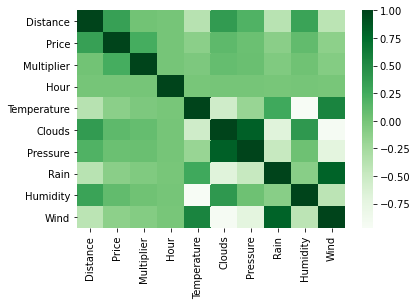

In [38]:
correlate = dfmerged.corr()
sns.heatmap(correlate, cmap='Greens')

##### 5.1.2. Pie chart cab population <a class="anchor" id="section_5_1_2"></a>


A pie chart is created of the cab quantities of Uber and Lyft.

In [39]:
dfmerged['Cab'].value_counts() # displays the quantities of the feature's different values

Uber    330568
Lyft    307408
Name: Cab, dtype: int64

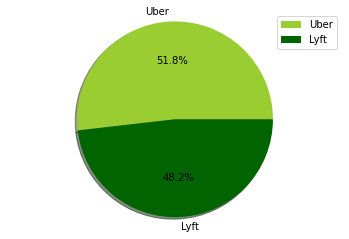

In [40]:
labels = ['Uber','Lyft']
size = [330568,307408]
colors = ['yellowgreen','darkgreen']
plt.pie(size,labels=labels,colors=colors,shadow=True,autopct='%1.1f%%')
plt.legend()
plt.axis('equal')
plt.show()

##### 5.1.3. Central tendencies of price <a class="anchor" id="section_5_1_3"></a>
 
##### Money, money, money!
##### Create a table of the central tendencies of the 'price' variable:
Central tendencies include: mean, minimum, maximum, mode, median and standard deviation.
The cell below calculates the above values and assigns them to a variable.
These values are then printed in the last line of the cell.

In [41]:
a = dfmerged['Price'].mean() # Calculating the mean of price
b = dfmerged['Price'].min() # Calculating the minimum price
c = dfmerged['Price'].max() # Calculating the maximum price
d = dfmerged['Price'].median() # Calculating the median price
e = dfmerged['Price'].std() # Calculating price's standard deviation
f = dfmerged['Price'].mode() # Calculating the most frequent price
print(a,b,c,d,e,f)

16.545125490614065 2.5 97.5 13.5 9.324358581419423 0    7.0
dtype: float64


Using the printed values, these are then assigned to a table along with its headings.
The last line of the cell again prints, this time a table is used using the tabulate function.

In [42]:
table = [['Central tendency','Value'], ['Mean',16.55],['Minimum',2.5],['Maximum',97.5],
         ['Median',13.5],['Standard deviation',9.32],['Mode',7.0]]
print(tabulate(table,headers='firstrow',tablefmt="simple",showindex=range(1,7)))

    Central tendency      Value
--  ------------------  -------
 1  Mean                  16.55
 2  Minimum                2.5
 3  Maximum               97.5
 4  Median                13.5
 5  Standard deviation     9.32
 6  Mode                   7


##### 5.1.4. Bar chart of cab types <a class="anchor" id="section_5_1_4"></a>

##### Create a bar chart of the types of cab within the dataset:

The cell below counts the quantities of the column which are assigned to a different cab type.

In [43]:
dfmerged['CabType'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lyft            51235
Lyft XL         51235
Lux Black XL    51235
Lux Black       51235
Lux             51235
Shared          51233
Name: CabType, dtype: int64

Here we then use .unique to display the names of which the quantities are assigned under.

In [44]:
dfmerged['CabType'].unique() # Displays the names of each cab type.

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

Using the above information, this is used to create two bar charts - one corresponding to Uber and one Lyft.

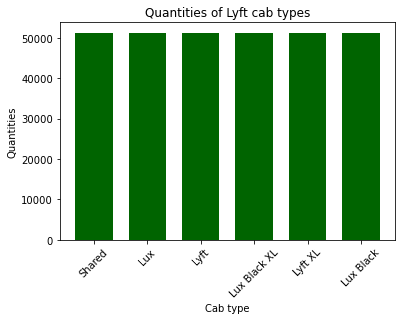

In [45]:
labels = ['Shared','Lux','Lyft','Lux Black XL','Lyft XL','Lux Black']
size = [51233,51235,51235,51235,51235,51235]
plt.xticks(range(len(size)),labels,rotation=45)
width = 0.7
plt.xlabel('Cab type')
plt.ylabel('Quantities')
plt.title('Quantities of Lyft cab types')
plt.bar(range(len(size)),size, color='darkgreen',width=width)
plt.show()

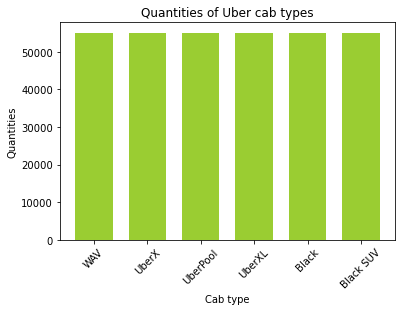

In [46]:
labels = ['WAV','UberX','UberPool','UberXL','Black','Black SUV']
size =[55096,55094,55091,55096,55095,55096]
plt.xticks(range(len(size)),labels,rotation=45)
width = 0.7
plt.xlabel('Cab type')
plt.ylabel('Quantities')
plt.title('Quantities of Uber cab types')
plt.bar(range(len(size)),size, color='yellowgreen',width=width)
plt.show()

##### 5.1.5. Line graph of price per weekday <a class="anchor" id="section_5_1_5"></a>

The final graphed descriptive statistic is that of the average cab price per weekday.
The data is first grouped by each day of the week, after which the price mean is calculated and plotted.

<AxesSubplot:title={'center':'Average cab price per weekday'}, xlabel='Weekday', ylabel='Average price of a cab'>

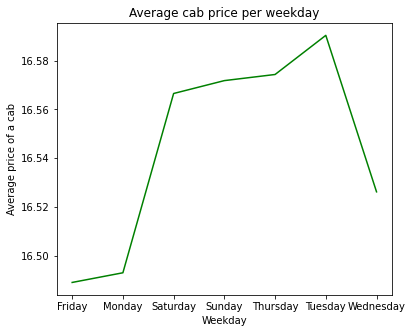

In [47]:
Week_AvgPrice = dfmerged.groupby(['Weekday'])['Price'].mean()
Week_AvgPrice.plot(kind='line', title='Average cab price per weekday', ylabel='Average price of a cab',
         xlabel='Weekday',color='g', figsize=(6, 5))

### 5.2. Feature selection <a class="anchor" id="section_5_2"></a>

##### 5.2.1. Changing feature indices  <a class="anchor" id="section_5_2_1"></a>

This subsection will change the indices of the first few variables in order to implement feature scaling.

In [48]:
data.columns # prints the feature names

Index(['Distance', 'Price', 'Multiplier', 'Hour', 'Temperature', 'Clouds',
       'Pressure', 'Rain', 'Humidity', 'Wind', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening',
       'Morning', 'Night', 'Source.Back Bay', 'Source.Beacon Hill',
       'Source.Boston University', 'Source.Fenway',
       'Source.Financial District', 'Source.Haymarket Square',
       'Source.North End', 'Source.North Station',
       'Source.Northeastern University', 'Source.South Station',
       'Source.Theatre District', 'Source.West End', 'Cab.Lyft', 'Cab.Uber',
       'CabType.Black', 'CabType.Black SUV', 'CabType.Lux',
       'CabType.Lux Black', 'CabType.Lux Black XL', 'CabType.Lyft',
       'CabType.Lyft XL', 'CabType.Shared', 'CabType.UberPool',
       'CabType.UberX', 'CabType.UberXL', 'CabType.WAV',
       'Destination.Back Bay', 'Destination.Beacon Hill',
       'Destination.Boston University', 'Destination.Fenway',
       'Destination.Fina

In [49]:
data = data[['Price','Multiplier','Distance','Clouds','Pressure','Hour', 'Temperature',
       'Rain', 'Humidity', 'Wind', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening',
       'Morning', 'Night', 'Source.Back Bay', 'Source.Beacon Hill',
       'Source.Boston University', 'Source.Fenway',
       'Source.Financial District', 'Source.Haymarket Square',
       'Source.North End', 'Source.North Station',
       'Source.Northeastern University', 'Source.South Station',
       'Source.Theatre District', 'Source.West End', 'Cab.Lyft', 'Cab.Uber',
       'CabType.Black', 'CabType.Black SUV', 'CabType.Lux',
       'CabType.Lux Black', 'CabType.Lux Black XL', 'CabType.Lyft',
       'CabType.Lyft XL', 'CabType.Shared', 'CabType.UberPool',
       'CabType.UberX', 'CabType.UberXL', 'CabType.WAV',
       'Destination.Back Bay', 'Destination.Beacon Hill',
       'Destination.Boston University', 'Destination.Fenway',
       'Destination.Financial District', 'Destination.Haymarket Square',
       'Destination.North End', 'Destination.North Station',
       'Destination.Northeastern University', 'Destination.South Station',
       'Destination.Theatre District', 'Destination.West End']]# Rearrange price and distance
            
data # print the dataset

,Price,Multiplier,Distance,Clouds,Pressure,Hour,Temperature,Rain,Humidity,Wind,...,Destination.Boston University,Destination.Fenway,Destination.Financial District,Destination.Haymarket Square,Destination.North End,Destination.North Station,Destination.Northeastern University,Destination.South Station,Destination.Theatre District,Destination.West End
0,5.0,1.0,0.44,0.687223,1008.445239,9,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
1,11.0,1.0,0.44,0.687223,1008.445239,2,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
2,7.0,1.0,0.44,0.687223,1008.445239,1,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
3,26.0,1.0,0.44,0.687223,1008.445239,4,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
4,9.0,1.0,0.44,0.687223,1008.445239,3,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637972,13.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637973,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637974,27.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0


In [50]:
data.to_csv('cabweatherdd.csv',index=False) # override previous saved file

##### 5.2.2. Filter method  <a class="anchor" id="section_5_2_2"></a>

Before conducting Pearson's correlation, we once again check the data of any NaN values, as these cannot be removed once the data becomes an array.

In [51]:
data.isna().sum()
data.replace(np.nan, 0)

,Price,Multiplier,Distance,Clouds,Pressure,Hour,Temperature,Rain,Humidity,Wind,...,Destination.Boston University,Destination.Fenway,Destination.Financial District,Destination.Haymarket Square,Destination.North End,Destination.North Station,Destination.Northeastern University,Destination.South Station,Destination.Theatre District,Destination.West End
0,5.0,1.0,0.44,0.687223,1008.445239,9,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
1,11.0,1.0,0.44,0.687223,1008.445239,2,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
2,7.0,1.0,0.44,0.687223,1008.445239,1,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
3,26.0,1.0,0.44,0.687223,1008.445239,4,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
4,9.0,1.0,0.44,0.687223,1008.445239,3,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637972,13.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637973,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637974,27.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0


Once the file is again cleansed, we calculate the filter method exhibiting the study's features which contains a correlation greater than 0.3 with price.

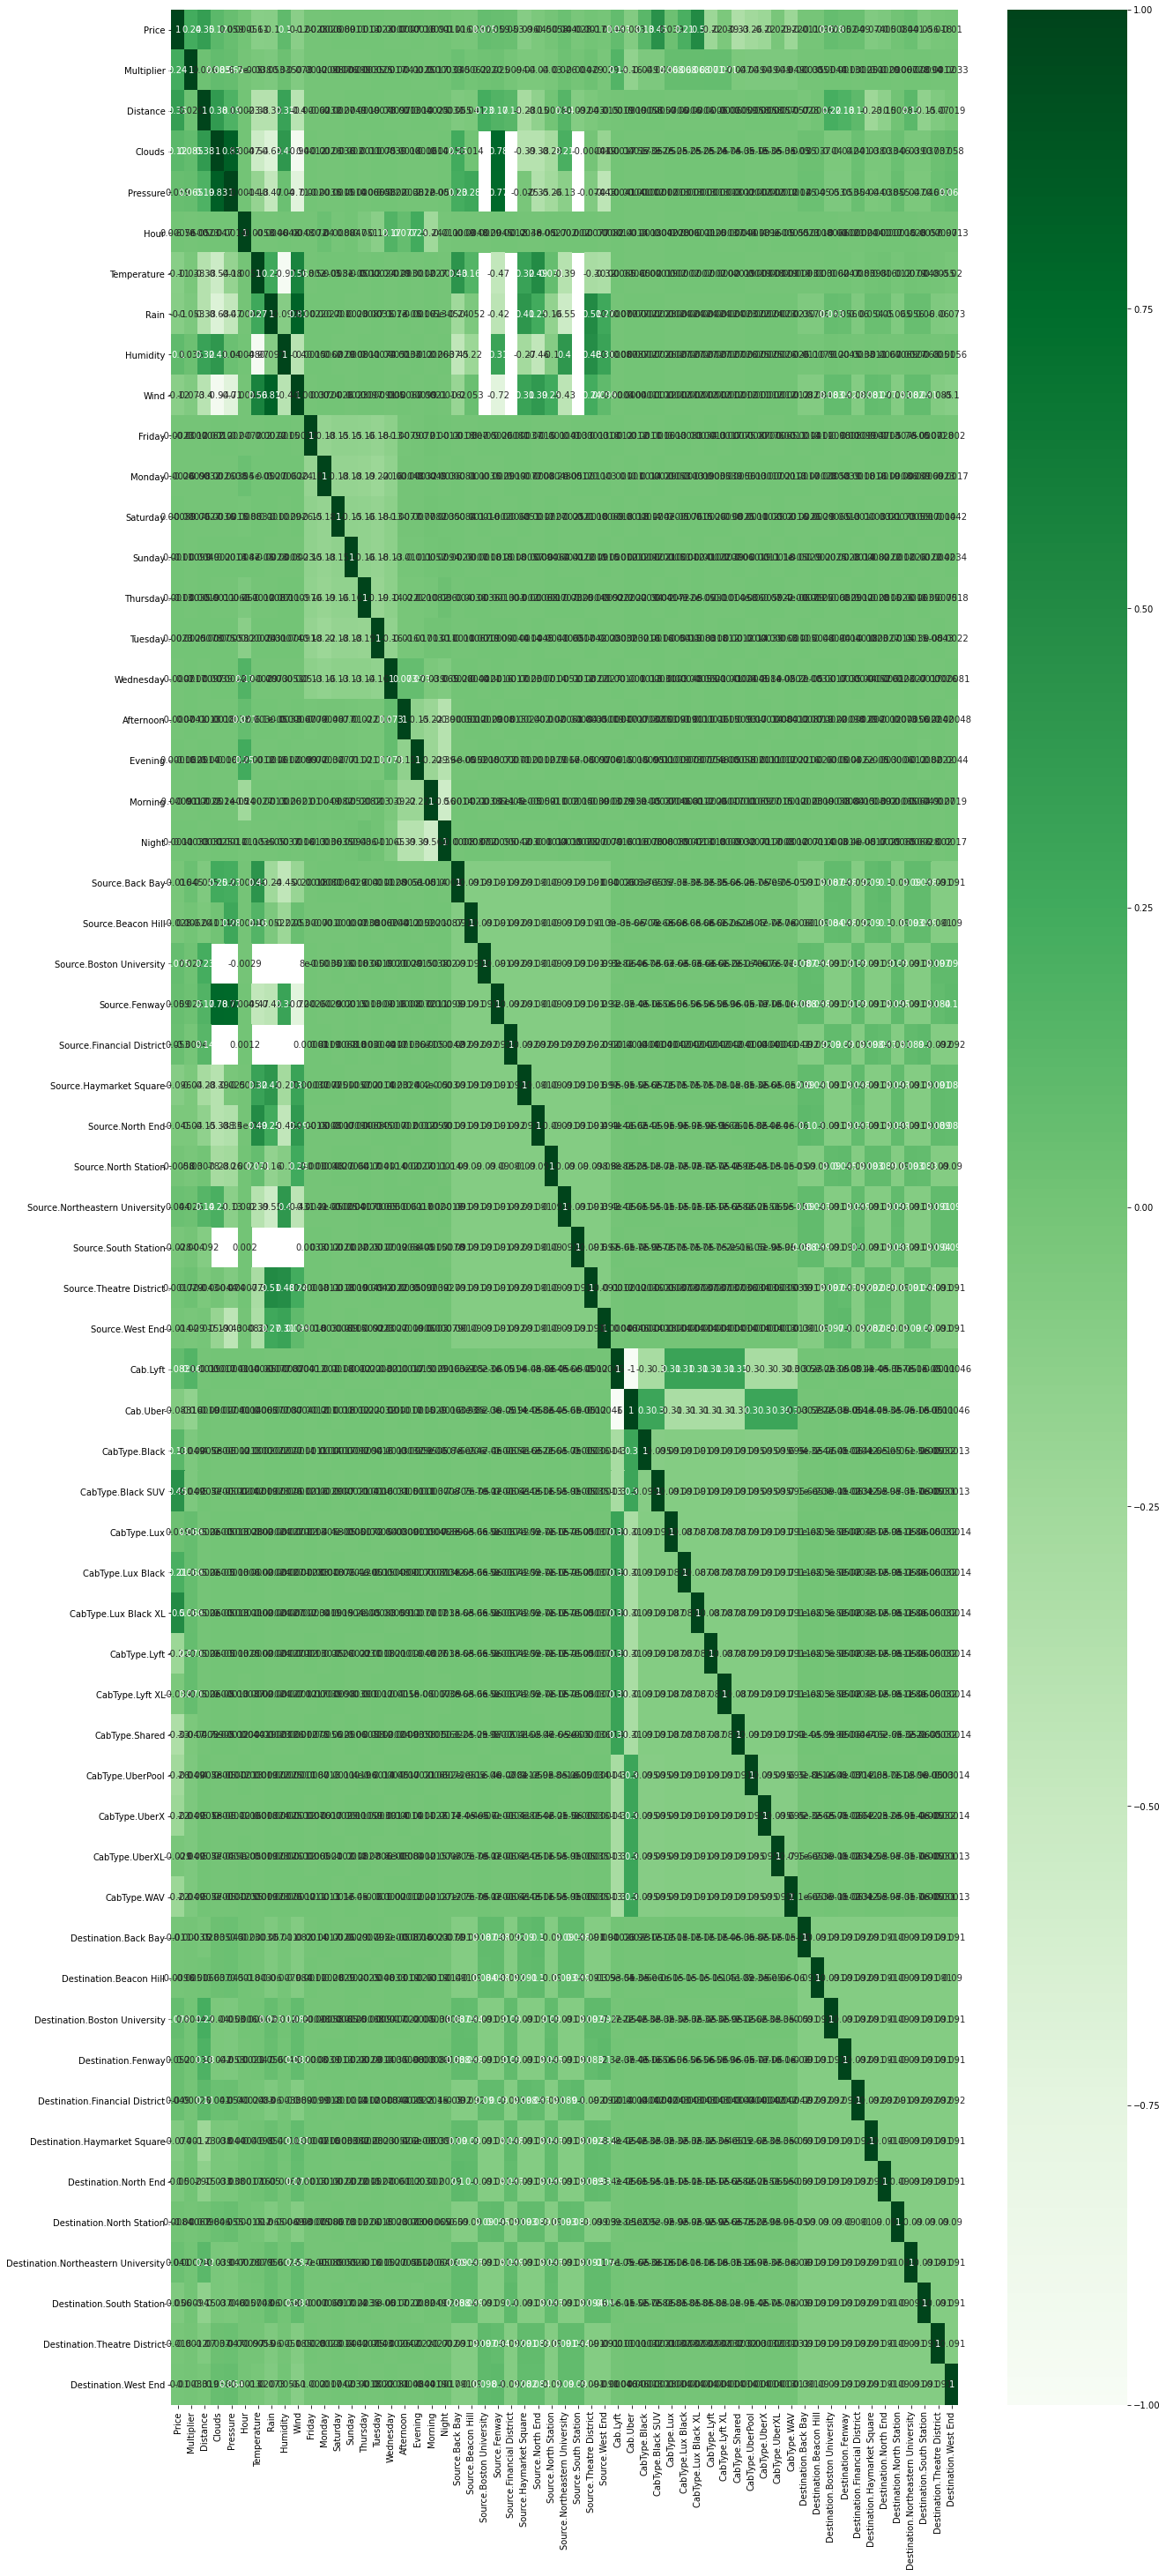

Price                   1.000000
Distance                0.345061
CabType.Black SUV       0.453096
CabType.Lux Black XL    0.500057
CabType.Shared          0.333235
Name: Price, dtype: float64

In [52]:
# Source: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

plt.figure(figsize=(20,50))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

cor_target = abs(cor["Price"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

### 5.3. Predictive modelling <a class="anchor" id="section_5_3"></a>

##### 5.3.1. Predictor and response <a class="anchor" id="section_5_3_1"></a>

Here, we assign features to the predictor and response for model 01.

In [53]:
X = data[['Multiplier','Distance','Clouds','Pressure','Hour', 'Temperature',
       'Rain', 'Humidity', 'Wind', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon', 'Evening',
       'Morning', 'Night', 'Source.Back Bay', 'Source.Beacon Hill',
       'Source.Boston University', 'Source.Fenway',
       'Source.Financial District', 'Source.Haymarket Square',
       'Source.North End', 'Source.North Station',
       'Source.Northeastern University', 'Source.South Station',
       'Source.Theatre District', 'Source.West End', 'Cab.Lyft', 'Cab.Uber',
       'CabType.Black', 'CabType.Black SUV', 'CabType.Lux',
       'CabType.Lux Black', 'CabType.Lux Black XL', 'CabType.Lyft',
       'CabType.Lyft XL', 'CabType.Shared', 'CabType.UberPool',
       'CabType.UberX', 'CabType.UberXL', 'CabType.WAV',
       'Destination.Back Bay', 'Destination.Beacon Hill',
       'Destination.Boston University', 'Destination.Fenway',
       'Destination.Financial District', 'Destination.Haymarket Square',
       'Destination.North End', 'Destination.North Station',
       'Destination.Northeastern University', 'Destination.South Station',
       'Destination.Theatre District', 'Destination.West End']] 
y = data[['Price']]
data.isna().sum()
data.replace(np.nan, 0)

,Price,Multiplier,Distance,Clouds,Pressure,Hour,Temperature,Rain,Humidity,Wind,...,Destination.Boston University,Destination.Fenway,Destination.Financial District,Destination.Haymarket Square,Destination.North End,Destination.North Station,Destination.Northeastern University,Destination.South Station,Destination.Theatre District,Destination.West End
0,5.0,1.0,0.44,0.687223,1008.445239,9,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
1,11.0,1.0,0.44,0.687223,1008.445239,2,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
2,7.0,1.0,0.44,0.687223,1008.445239,1,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
3,26.0,1.0,0.44,0.687223,1008.445239,4,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
4,9.0,1.0,0.44,0.687223,1008.445239,3,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637972,13.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637973,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637974,27.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0


Here, we assign features to the predictor and response for model 02.

In [54]:
x = data[['Distance', 'CabType.Black SUV', 'CabType.Lux Black XL', 'CabType.Shared']]
Y = data[['Price']]
data.isna().sum()
data.replace(np.nan, 0)

,Price,Multiplier,Distance,Clouds,Pressure,Hour,Temperature,Rain,Humidity,Wind,...,Destination.Boston University,Destination.Fenway,Destination.Financial District,Destination.Haymarket Square,Destination.North End,Destination.North Station,Destination.Northeastern University,Destination.South Station,Destination.Theatre District,Destination.West End
0,5.0,1.0,0.44,0.687223,1008.445239,9,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
1,11.0,1.0,0.44,0.687223,1008.445239,2,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
2,7.0,1.0,0.44,0.687223,1008.445239,1,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
3,26.0,1.0,0.44,0.687223,1008.445239,4,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
4,9.0,1.0,0.44,0.687223,1008.445239,3,39.067897,0.057934,0.764837,6.843193,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637972,13.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637973,9.5,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0
637974,27.0,1.0,1.00,0.687767,1008.441090,23,38.983403,0.057822,0.767266,6.816233,...,0,0,0,0,1,0,0,0,0,0


##### 5.3.2. Standardization <a class="anchor" id="section_5_3_2"></a>

Using the standardized feature selection methods, we standardize all x and y values for training and testing.

In [55]:
standardizedX = preprocessing.scale(X)
standardizedy = preprocessing.scale(y)
standardizedx = preprocessing.scale(x)
standardizedY = preprocessing.scale(Y)
standardizedX

array([[-0.15790499, -1.54063979, -1.10201824, ..., -0.30149381,
        -0.30158661, -0.3009769 ],
       [-0.15790499, -1.54063979, -1.10201824, ..., -0.30149381,
        -0.30158661, -0.3009769 ],
       [-0.15790499, -1.54063979, -1.10201824, ..., -0.30149381,
        -0.30158661, -0.3009769 ],
       ...,
       [-0.15790499, -1.04742681, -0.54162915, ..., -0.30149381,
        -0.30158661, -0.3009769 ],
       [-0.15790499, -1.04742681, -0.54162915, ..., -0.30149381,
        -0.30158661, -0.3009769 ],
       [-0.15790499, -1.04742681, -0.54162915, ..., -0.30149381,
        -0.30158661, -0.3009769 ]])

##### 5.3.3. Train and test split <a class="anchor" id="section_5_3_3"></a>

This section notes the process of dividing the data into training and testing sets.

80% of the data is to be used for training, and the remaining 20% to be used for testing.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(standardizedX, standardizedy, test_size=0.2)
x_train, x_test, Y_train, Y_test = train_test_split(standardizedx, standardizedY, test_size=0.2)

##### 5.3.4.. Multiple linear regression (MLR) <a class="anchor" id="section_5_3_4"></a>

Once the data has been divided, we now construct the multiple linear regression model. Using a scoring system of the r-squared values and 10 K-fold cross validation.

##### 5.3.4.1. Training MLR model 01 <a class="anchor" id="section_5_3_4_1"></a>

In [57]:
model = LinearRegression()
regmodel = model.fit(X_train, y_train)
score = cross_val_score(regmodel, X_train, y_train, scoring='r2', cv=10)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Average the cross validation across all folds.

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

Predict the model.

In [ ]:
from sklearn.model_selection import cross_val_predict 
y_predtrain = model.predict(X_train)
y_predtrain

Compute the models r-squared value.

In [ ]:
from numpy import math
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_train, y_predtrain)

... and mean squared error.

In [ ]:
mean_squared_error(y_train,y_predtrain)

Display the predicted model against the actual model.

In [ ]:
plt.figure(figsize=(20,50))
color = ['yellowgreen']
plt.scatter(y_train, y_predtrain,color=color)
plt.xlabel('Training')
plt.ylabel('Predicted')
plt.title('MLR Training vs. Predicted')
plt.show()

##### 5.3.4.2. Training MLR model 02 <a class="anchor" id="section_5_4_4_2"></a>

This model contains only the features exhibited in the output of the filter method.

In [ ]:
mod = LinearRegression()
regmodel2 = model.fit(x_train, Y_train)
valscore = cross_val_score(regmodel2, x_train, Y_train, scoring='r2', cv=10)
valscore

Average the cross validation across all folds.

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (valscore.mean(), valscore.std()))

Predict model 02.

In [ ]:
y_predtrain2 = model.predict(x_train)
y_predtrain2

Compute the models r-squared value.

In [ ]:
r2_score(Y_train, y_predtrain2)

... and mean squared error.

In [ ]:
mean_squared_error(Y_train,y_predtrain2)

Graph the predicted and actual training results of model 02

In [ ]:
plt.figure(figsize=(20,50))
color = ['yellowgreen']
plt.scatter(Y_train, y_predtrain2,color=color)
plt.xlabel('Training')
plt.ylabel('Predicted')
plt.title('MLR model 02 Training vs. Predicted')
plt.show()

##### 5.3.5. Lasso regression <a class="anchor" id="section_5_3_5"></a>

This model uses an alternative form of regression using all included features of the study.

In [ ]:
from sklearn.linear_model import Lasso
from numpy import absolute
from numpy import std
mdl = Lasso(alpha=0.01)
lassomdl = mdl.fit(X_train, y_train)
scoreL = cross_val_score(mdl, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
scoreL = absolute(scoreL)
print("%0.2f accuracy with a standard deviation of %0.3f" % (mean(scoreL), std(scoreL)))

Average the cross validation across all folds.

In [ ]:
scoreL.mean()

Predict model 03.

In [ ]:
y_predLtrain = lassomdl.predict(X_train)
y_predLtrain

Compute the r-squared value.

In [ ]:
r2_score(y_train, y_predLtrain)

... and the mean squared error.

In [ ]:
mean_squared_error(y_train,y_predLtrain)

Graph the training and predicted results of model 03.

In [ ]:
plt.figure(figsize=(20,50))
color = ['green']
plt.scatter(y_train, y_predLtrain,color=color)
plt.xlabel('Training')
plt.ylabel('Predicted')
plt.title('Lasso Training vs. Predicted')
plt.show()

##### 5.3.6. Final predictive model <a class="anchor" id="section_5_3_6"></a>


In [ ]:
regmodeltest = model.fit(X_test, y_test)
scores = cross_val_score(regmodeltest, X_test, y_test, scoring='r2', cv=10)
scores

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.3f" % (scores.mean(), scores.std()))

In [ ]:
from sklearn.model_selection import cross_val_predict 
y_predtest = model.predict(X_test)
y_predtest

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predtest)

In [ ]:
mean_squared_error(y_test,y_predtest)

In [ ]:
plt.figure(figsize=(20,50))
color='darkgreen'
plt.scatter(y_test, y_predtest,color=color)
plt.xlabel('Testing')
plt.ylabel('Predicted')
plt.title('Testing vs. Predicted')
plt.show()

###### 5.3.6.1. Interpreting the final model <a class="anchor" id="section_5_3_6_1"></a>


In [ ]:
reg = a.OLS(y, X).fit()
reg.summary()